In [1]:
import re
import numpy as np
import pandas as pd
from math import * 
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline 

In [2]:
#for i in range(len(prices)):
    #prices[i] = prices[i].replace(',', '')
    #prices[i] = prices[i].strip('$')
    #prices[i] = float(prices[i])
   

## Calendar Data 

In [3]:
time_data = pd.read_csv('Airbnb_data/calendar.csv', delimiter=',')

/anaconda2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Regex the price and generate log(price)
time_data['price'] = time_data['price'].replace('[\$,)]','', regex=True).replace('[(]','-', regex=True).astype(float)
time_data['log_price'] = np.log(time_data['price'].values)

In [5]:
time_data.head()

,adjusted_price,available,date,listing_id,maximum_nights,minimum_nights,price,log_price
0,NaN,f,2019-05-27,3781,NaN,NaN,NaN,NaN
1,NaN,t,2019-09-13,50032,NaN,NaN,700.0,6.55108
2,NaN,t,2019-09-12,50032,NaN,NaN,700.0,6.55108
3,NaN,t,2019-09-11,50032,NaN,NaN,700.0,6.55108
4,NaN,t,2019-09-10,50032,NaN,NaN,700.0,6.55108


In [6]:
time_data.size

193537600

In [7]:
# Only consider data for which there is data
nan_adjusted = time_data[np.isfinite(time_data['log_price'])]

In [8]:
#Still left with a reasonable amount of observations
nan_adjusted.size

100516648

In [9]:
# Group by listing_id, then find each listing id's average price
grouped = nan_adjusted.groupby(['listing_id'], as_index = False)

means = grouped['price'].mean().values
log_means = grouped['log_price'].mean().values

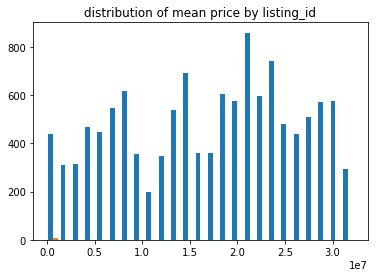

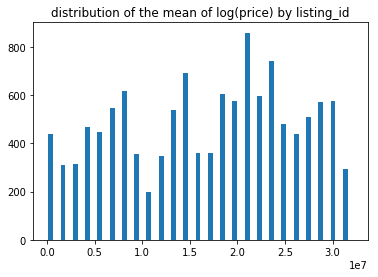

In [10]:

plt.hist(means, bins='auto')  # arguments are passed to np.histogram
plt.title("distribution of mean price by listing_id")
plt.show()

plt.hist(log_means, bins='auto')  # arguments are passed to np.histogram
plt.title("distribution of the mean of log(price) by listing_id")
plt.show()

In [11]:
#Goals: 
# 1)Get the average price for each specific listing [done]
# 2)Compute the distance between each day's price and the average price [done]
# 3)Visualize spikes [done]
# 4)For each day, check the change in price [done]

In [12]:
# Find high demand dates by checking for positive distance between a listings average price and it's current price.
# For these purposes, high demand is categorized as a date which experienced, on average, properties being 
# priced above their average list price

In [13]:
print ("number of unique properties:", len(nan_adjusted['listing_id'].unique()))

number of unique properties: 12262


In [14]:
# Let's sort to make things easier on pattern matching algorithm
#df.sort_values(by='col1', ascending=False)
nan_adjusted.sort_values(by=['listing_id'], inplace=True)
time_data.sort_values(by=['listing_id'], inplace=True)

/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
mean_df = grouped.mean()
mean_df['listing_id']

0            3353
1            3781
2            5453
3            5506
4            6695
5            6976
6            8789
7            8792
8            8865
9            9273
10           9765
11           9824
12           9827
13           9855
14           9857
15           9858
16           9859
17           9860
18           9870
19           9903
20          10730
21          10758
22          10807
23          10809
24          10810
25          10811
26          10813
27          10986
28          12356
29          12441
           ...   
12232    32116807
12233    32125673
12234    32127951
12235    32133411
12236    32133771
12237    32138377
12238    32141341
12239    32147828
12240    32155120
12241    32158419
12242    32161143
12243    32162031
12244    32163609
12245    32163985
12246    32168098
12247    32172713
12248    32180329
12249    32183321
12250    32188679
12251    32195225
12252    32196121
12253    32197096
12254    32202426
12255    32213220
12256    3

In [16]:
# Maybe I need to reset the index, who the hell knows if I'll use this later
nan_adjusted.reset_index(inplace=True)

In [17]:
# Initialize an empty column for the price differences 
nan_adjusted['price_diff'] = 0


/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
nan_adjusted['listing_id'].count()/1000

12564.581

In [19]:
i=729
nan_adjusted.iloc[i]['price_diff'] = nan_adjusted.iloc[i]['price'] - mean_df.iloc[nan_adjusted.iloc[i]['listing_id']]['price']
print(nan_adjusted.iloc[i]['price_diff'])   

0


/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
for i in range(0,729):
    nan_adjusted.iloc[i]['price_diff'] = nan_adjusted.iloc[i]['price'] - mean_df.iloc[nan_adjusted.iloc[i]['listing_id']]['price']
    
    

/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
# Subset dataframe of averages for left-merge
mean_df_new = mean_df[['listing_id','price']]
mean_df_new

,listing_id,price
0,3353,341.289474
1,3781,249.801836
2,5453,132.142857
3,5506,254.493247
4,6695,233.993224
5,6976,281.453861
6,8789,188.356007
7,8792,191.876276
8,8865,130.631021
9,9273,150.958959


In [22]:
# Left-Merge
new = nan_adjusted.merge(mean_df_new,how='left', left_on='listing_id', right_on='listing_id')

In [23]:
# Compute price differences 
new['price_diff'] = new['price_x'] - new['price_y']


In [24]:
# Convert dates to datetime
dates = pd.to_datetime(new['date'].values)


In [25]:
# Add new datetime object
new['datetime'] = dates


In [26]:
# Groupby datetime, get average price difference
final = new.groupby(['datetime'], as_index = False)
final_sums = final['price_diff'].mean()
final_sums

,datetime,price_diff
0,2015-10-02,29.740563
1,2015-10-03,69.072196
2,2015-10-04,18.293125
3,2015-10-05,13.389428
4,2015-10-06,0.396260
5,2015-10-07,-2.637332
6,2015-10-08,11.355889
7,2015-10-09,42.505009
8,2015-10-10,62.003574
9,2015-10-11,29.246550


from sklearn import preprocessing
import numpy as np
max_abs_scaler = preprocessing.MaxAbsScaler()
final_sums['price_diff'] = max_abs_scaler.fit_transform(final_sums['price_diff'])
final_sums['price_diff'] 


Text(0.5, 1.0, 'Days When List Price Exceeded Average List Price for Individual AirBnbs')

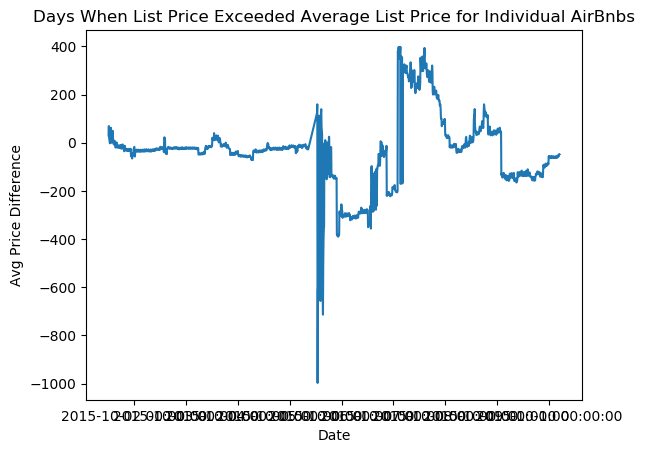

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# Examine overall price difference trend


fig, ax = plt.subplots()
ax.plot(final_sums['datetime'],final_sums['price_diff'])
ax.set_xticklabels(final_sums['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Days When List Price Exceeded Average List Price for Individual AirBnbs')


In [29]:
# Subset the data for easier viewing 

fall = final_sums[(final_sums['datetime'] > '2018-09-22') & (final_sums['datetime'] < '2018-12-22')] 
winter = final_sums[(final_sums['datetime'] > '2018-12-21') | (final_sums['datetime'] < '2018-03-20')] 
spring = final_sums[(final_sums['datetime'] > '2018-03-19') & (final_sums['datetime'] < '2018-06-21')] 
summer = final_sums[(final_sums['datetime'] > '2018-06-20') & (final_sums['datetime'] < '2018-09-23')] 

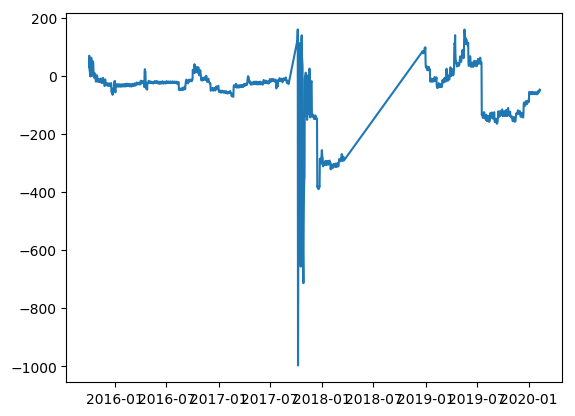

In [30]:
fig, ax = plt.subplots()
ax.plot(winter['datetime'],winter['price_diff'])


Text(0.5, 1.0, 'Average Price Difference in Winter')

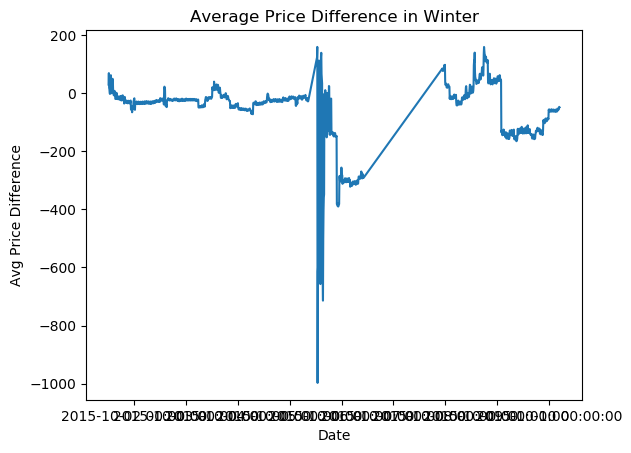

In [31]:
# WINTER 
fig, ax = plt.subplots()
ax.plot(winter['datetime'],winter['price_diff'])

ax.set_xticklabels(winter['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Winter')

Text(0.5, 1.0, 'Average Price Difference in Summer')

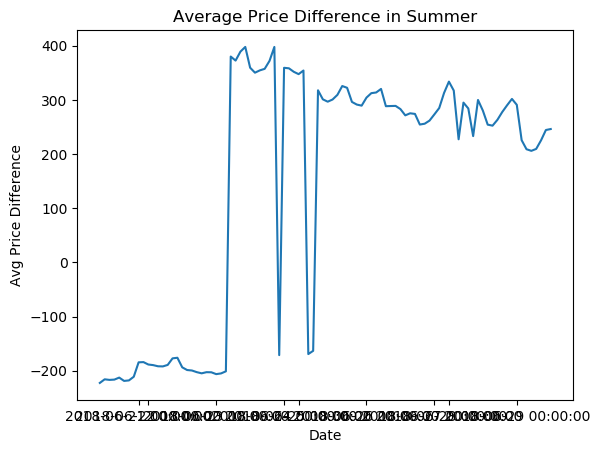

In [32]:
# SUMMER 

fig, ax = plt.subplots()
ax.plot(summer['datetime'],summer['price_diff'])
ax.set_xticklabels(summer['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Summer')

Text(0.5, 1.0, 'Average Price Difference in Fall')

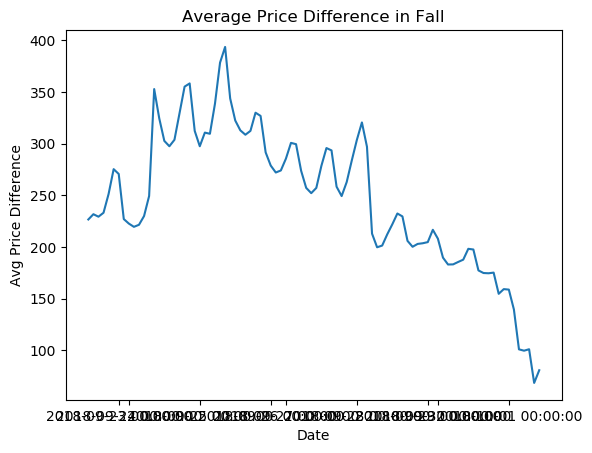

In [33]:
#FALL

fig, ax = plt.subplots()
ax.plot(fall['datetime'],fall['price_diff'])
ax.set_xticklabels(fall['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Fall')

Text(0.5, 1.0, 'Average Price Difference in Spring')

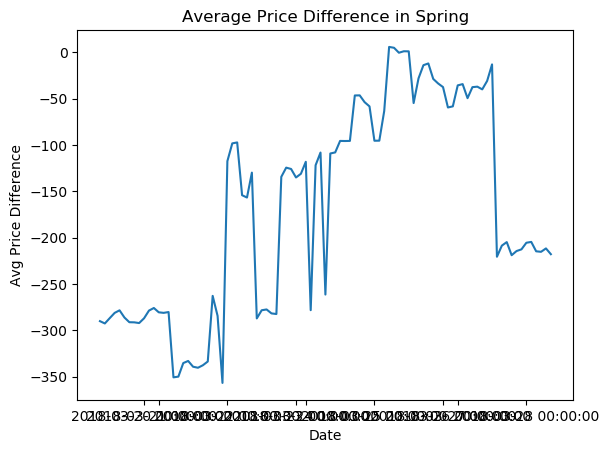

In [34]:
# SPRING

fig, ax = plt.subplots()
ax.plot(spring['datetime'],spring['price_diff'])
ax.set_xticklabels(spring['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Spring')